<a href="https://colab.research.google.com/github/Vixuz144/MN1/blob/main/Biseccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Instrucciones:*** Resuelva los ejercicios de la manera más detallada, completa y clara posible. Entregue las repuestas por escrito a más tardar la fecha señalda.

1. Obtenga una cota del número de iteraciones que se requieren para alcanzar una aproximación con una exactitud de $10^{-3}$ a la solución de $x^3 + x - 4$ que se encuentra en el intervalo $[1, 4]$.

Sea $|P_n - P| \leq \frac{b-a}{2^n}$,  cuando $n\geq 1$. Se busca un $n$ los suficientemente grande para $|P_n - P| \leq \frac{b-a}{2^n} \leq 10^{-3} $

Al sustituir se tiene lo siguiente.

$$ \frac{4-1}{2^n} \leq 10^{-3} $$
$$ 3 * 10^{3} \leq 2^n $$
$$ 2^n \geq 3000 $$
$$ \log_2(2^n) \geq \log_2(3000) $$
$$ n \log_2(2) \geq \log_2(3000) $$
$$ n \geq \log_2(3000) $$
$$ n \geq 11.55075 $$

In [1]:
from math import log2
print(round(log2(3*10**3), 5))
print(log2(3000))

11.55075
11.550746785383243



Por lo que nuestra cota para el número de iteraciones es 11.55075 o 12.
Esto porque la cantidad de iteraciones es un número entero que representa cuantas veces se ha ejecutado la sección ciclica del algoritmo.

De manera ilustrativa se puede observar en el codigo siguiente.

In [2]:
import numpy as np
import prettytable as pt

def Biseccion(f, a0, b0, tol = 10**-5, max_iter = 100, dec = 5):
  """
  return m, fm, i, cont_eval, error

  Algoritmo del Método de Bisección para aproximar la raiz de una función dentro de un intervalo dado.

  Entradas:
    f: Funcion a la cual se desea encontrar raíz.
    a0: Limite inferior del intervalo inicial de búsqueda.
    b0: Limite superior del intervalo inicial de búsqueda.
    tol: Tolerancia o error de aproximación requerido por el método.
    max_iter: Número máximo de iteraciones deseado.
    dec: Cantidad de decimales a mostrar en las tablas.

  Salidas:
    m: Aproximación a la raiz con un error de "tol".
    fm: Funcion evaluada en el punto "m". Aproximadamente 0.
    i: Cantidad de iteraciones realizadas durante la ejecución del algoritmo.
    cont_eval: Cantidad de evaluaciones de la función durante la ejecución del algoritmo.
    error: Diferencia entre los extremos de los subintervalos de la última iteración. Menor a "tol"
  """
  a, b = a0, b0
  error = tol * 100

  i = 0 # Inicializamos la variable que cuenta las iteraciones
  m = a + (b-a)/2 # Calculamos punto medio
  fa, fb, fm = f(a), f(b), f(m) #E valuamos los valores a, b, m
  cont_eval = 3 #Llevamos 3 evaluaciones
  T = pt.PrettyTable(['Iteración', 'a', 'b', 'f(a)', "f(b)", "m", "f(m)", "error"]) # Creamos la tabla con sus encabezados
  T.add_row([i, round(a, dec), round(b, dec), round(fa, dec), round(fb, dec), round(m, dec), round(fm, dec), '-------']) # Agregamos a la tabla la primer iteracion

  while i <= max_iter and error > tol: # Condiciones de paro
    if np.sign(fa) == np.sign(fm):
      a = m
      fa = fm
    else:
      b = m
      fb = fm

    m = a + (b-a)/2
    fm = f(m)

    i += 1
    cont_eval += 1
    error = abs(b-a)

    T.add_row([i, round(a, dec), round(b, dec), round(fa, dec), round(fb, dec), round(m, dec), round(fm, dec), round(error, dec)])

  print(T)
  return m, fm, i, cont_eval, error

In [3]:
help(Biseccion)

Help on function Biseccion in module __main__:

Biseccion(f, a0, b0, tol=1e-05, max_iter=100, dec=5)
    return m, fm, i, cont_eval, error
    
    Algoritmo del Método de Bisección para aproximar la raiz de una función dentro de un intervalo dado.
    
    Entradas: 
      f: Funcion a la cual se desea encontrar raíz.
      a0: Limite inferior del intervalo inicial de búsqueda.
      b0: Limite superior del intervalo inicial de búsqueda.
      tol: Tolerancia o error de aproximación requerido por el método.
      max_iter: Número máximo de iteraciones deseado.
      dec: Cantidad de decimales a mostrar en las tablas.
    
    Salidas:
      m: Aproximación a la raiz con un error de "tol".
      fm: Funcion evaluada en el punto "m". Aproximadamente 0.
      i: Cantidad de iteraciones realizadas durante la ejecución del algoritmo.
      cont_eval: Cantidad de evaluaciones de la función durante la ejecución del algoritmo.
      error: Diferencia entre los extremos de los subintervalos de

In [4]:
f = lambda x: x**3 + x - 4
a = 1
b = 4
tol = 10**-3

m, fm, i, c_e, e = Biseccion(f, a, b, tol)

print(f'\nLa raiz está aproximadamente en {m} y su valor aproximado es {fm}')
print('Iteraciones necesarias %d. \tCantidad de evaluaciones de la función = %d.' %(i, c_e))
print("Error = %.7f" %e)

+-----------+---------+---------+----------+---------+---------+----------+---------+
| Iteración |    a    |    b    |   f(a)   |   f(b)  |    m    |   f(m)   |  error  |
+-----------+---------+---------+----------+---------+---------+----------+---------+
|     0     |    1    |    4    |    -2    |    64   |   2.5   |  14.125  | ------- |
|     1     |    1    |   2.5   |    -2    |  14.125 |   1.75  | 3.10938  |   1.5   |
|     2     |    1    |   1.75  |    -2    | 3.10938 |  1.375  | -0.02539 |   0.75  |
|     3     |  1.375  |   1.75  | -0.02539 | 3.10938 |  1.5625 |  1.3772  |  0.375  |
|     4     |  1.375  |  1.5625 | -0.02539 |  1.3772 | 1.46875 | 0.63718  |  0.1875 |
|     5     |  1.375  | 1.46875 | -0.02539 | 0.63718 | 1.42188 | 0.29652  | 0.09375 |
|     6     |  1.375  | 1.42188 | -0.02539 | 0.29652 | 1.39844 | 0.13326  | 0.04688 |
|     7     |  1.375  | 1.39844 | -0.02539 | 0.13326 | 1.38672 | 0.05336  | 0.02344 |
|     8     |  1.375  | 1.38672 | -0.02539 | 0.05336 |

2. Encuentre la raíz de la ecuación $x \log_{10} (x) - 1.2 = 0$ correcta a cinco cifras significativas por el método de bisección.

:

In [5]:
from math import log10
f = lambda x: x * log10(x) - 1.2
a = 2
b = 3
tol = 10**-5

m, fm, i, c_e, e = Biseccion(f, a, b, tol, dec = 7)

print(f'\nLa raiz está aproximadamente en {m} y su valor aproximado es {fm}')
print('Iteraciones necesarias %d. \tCantidad de evaluaciones de la función = %d.' %(i, c_e))
print("Error = %.17f" %e)

+-----------+-----------+-----------+------------+-----------+-----------+------------+-----------+
| Iteración |     a     |     b     |    f(a)    |    f(b)   |     m     |    f(m)    |   error   |
+-----------+-----------+-----------+------------+-----------+-----------+------------+-----------+
|     0     |     2     |     3     |  -0.59794  | 0.2313638 |    2.5    |  -0.20515  |  -------  |
|     1     |    2.5    |     3     |  -0.20515  | 0.2313638 |    2.75   | 0.0081649  |    0.5    |
|     2     |    2.5    |    2.75   |  -0.20515  | 0.0081649 |   2.625   | -0.0997856 |    0.25   |
|     3     |   2.625   |    2.75   | -0.0997856 | 0.0081649 |   2.6875  | -0.046126  |   0.125   |
|     4     |   2.6875  |    2.75   | -0.046126  | 0.0081649 |  2.71875  | -0.0190585 |   0.0625  |
|     5     |  2.71875  |    2.75   | -0.0190585 | 0.0081649 |  2.734375 | -0.0054662 |  0.03125  |
|     6     |  2.734375 |    2.75   | -0.0054662 | 0.0081649 | 2.7421875 | 0.0013445  |  0.015625 |


**Comparación de la eficiencia del *Método de Bisección***

Como se pudo observar con este ejercicio, a mayor número de iteraciones mayor precisión se tiene con el método. Sin embargo, esto nos podría presentar la situación en que necesitemos una enorme cantidad de iteraciones para llegar a una aproximación de la raíz. Para ello se ilustrará a continuación el costo de la proximación.

In [6]:
import matplotlib.pyplot as plt
def Grafica(f, a0, b0, tol = 10**-5, max_iter = 100):
  a, b = a0, b0
  error = tol * 100

  i = 0
  m = a + (b-a)/2
  fa, fb, fm = f(a), f(b), f(m)

  li = [i]
  lf = [fm]

  while i <= max_iter and error > tol:
    if np.sign(fa) == np.sign(fm):
      a = m
      fa = fm
    else:
      b = m
      fb = fm

    m = a + (b-a)/2
    fm = f(m)

    i += 1
    error = abs(b-a)

    li.append(i)
    lf.append(fm)

  plt.style.use('dark_background')
  plt.plot(li,lf)
  plt.title('Grafica iteraciones vs precisión')
  plt.xlabel("No. Iteraciones")
  plt.ylabel("f(x)")
  plt.show()

  return li, lf

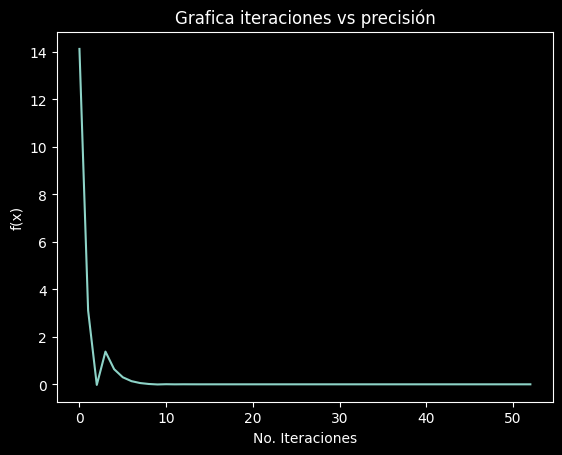

In [7]:
f = lambda x: x**3 + x - 4
a = 1
b = 4
tol = 10**-15

li, lf= Grafica(f, a, b, tol, 100)

En el gráfico anterior se muestra como la función evaluada en el punto medio de cada iteración se aproxima cada vez más a 0. En otras palabras, la aprocimación mejora con cada iteración.

Para observar que es lo que pasa de mejor manera, se realizará una gráfica cada pocas iteraciones para comparar.

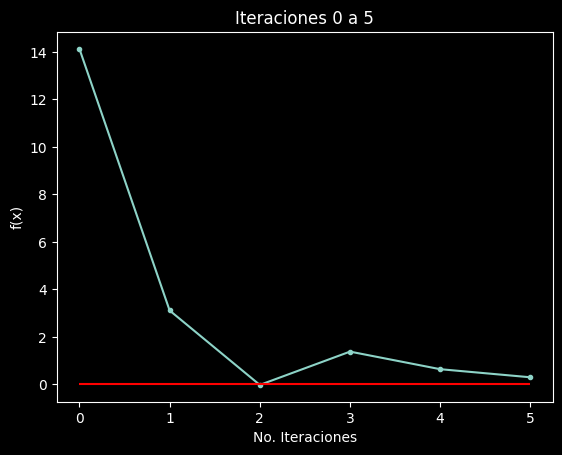

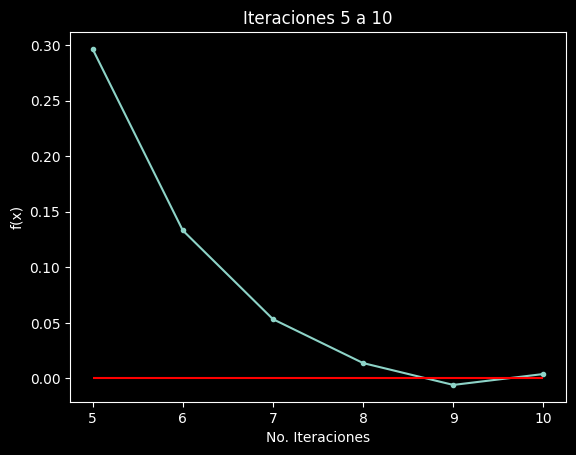

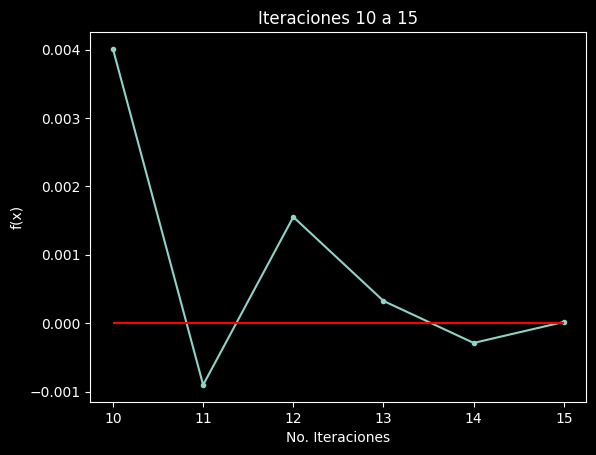

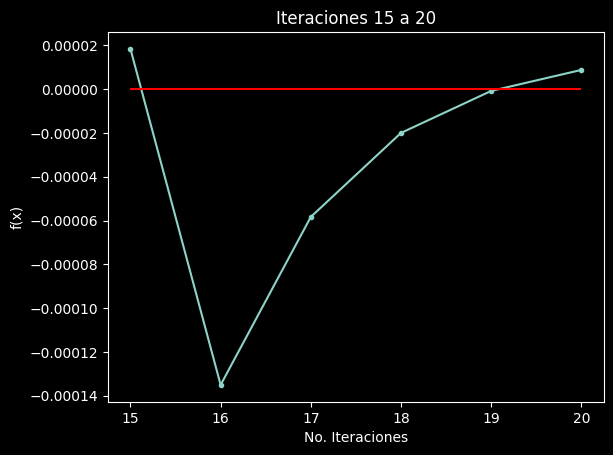

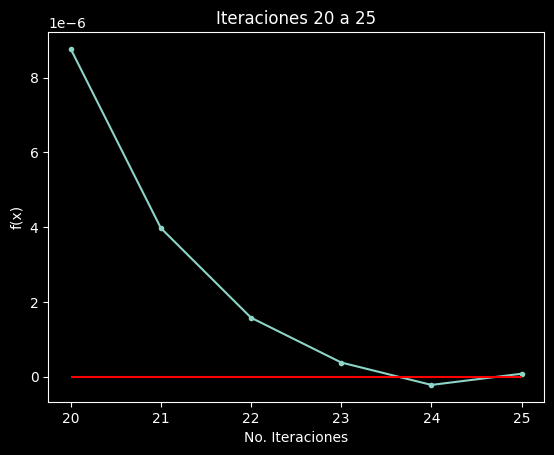

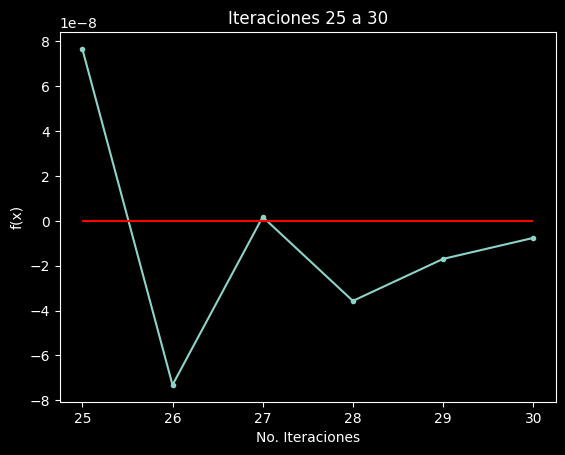

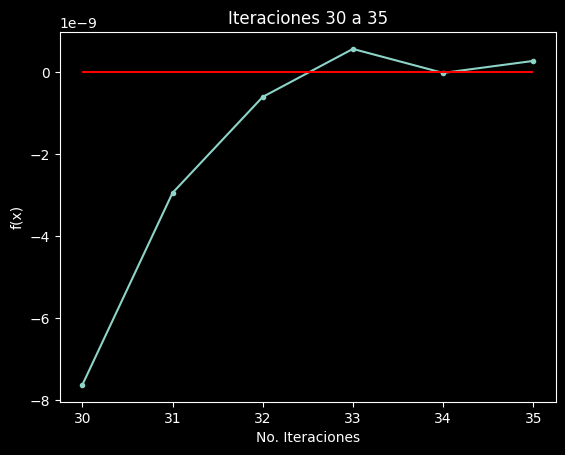

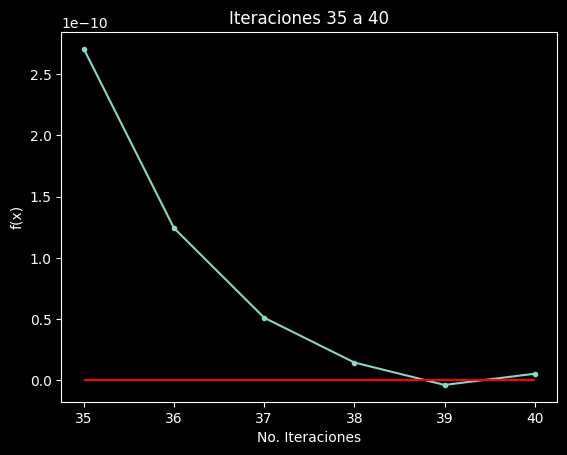

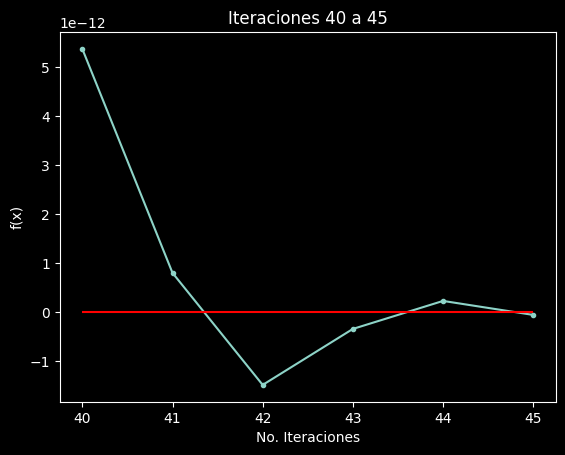

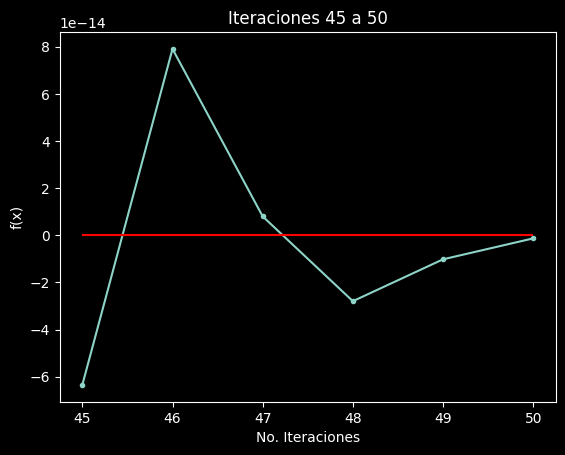

In [8]:
paso = 5

for i in range(0, len(lf)//paso):
  c = i*paso
  d = (i+1)*paso

  plt.plot(li[c:d+1], lf[c:d+1], '.-')
  plt.hlines(0, c, d, 'r')

  plt.title(f'Iteraciones {c} a {d}')
  plt.xlabel("No. Iteraciones")
  plt.ylabel("f(x)")

  print()
  plt.show()

En estas gráficas se puede observar el comportamiento más a detalle del *método de bisección*.

Ahora, veamos más ejemplos.

$$f(x) = \sqrt x - \cos(x), \quad x∈[0,2]$$

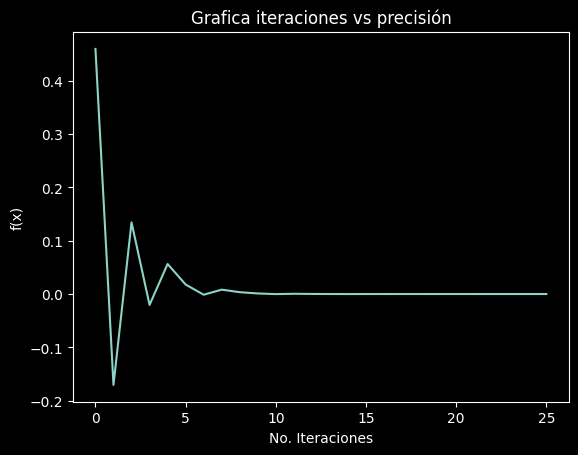

In [9]:
f = lambda x: np.sqrt(x) - np.cos(x)

a = 0
b = 2
tol = 10**-7

li, lf= Grafica(f, a, b, tol, 100)

$$ f(x) = x^2 - \ln(x) - 3, \quad x \in [0.5, 3.5 ]  $$

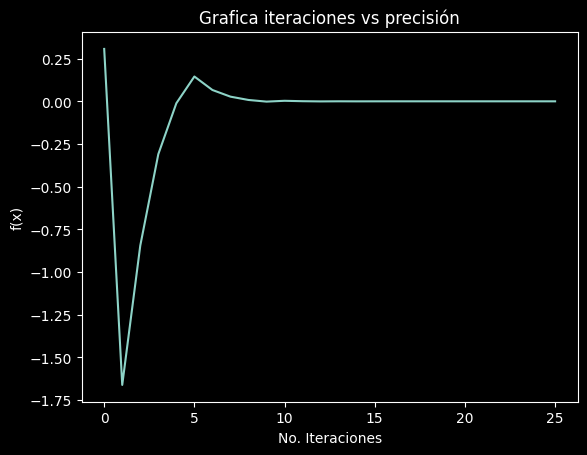

In [10]:
f = lambda x: x **2 - np.log(x) - 3

a = 0.5
b = 3.5
tol = 10**-7

li, lf= Grafica(f, a, b, tol, 100)

$$f(x) = \sqrt{e^{\sin(x^2)}-\cos(x)} - 1, \quad x\in[-4,-2] $$

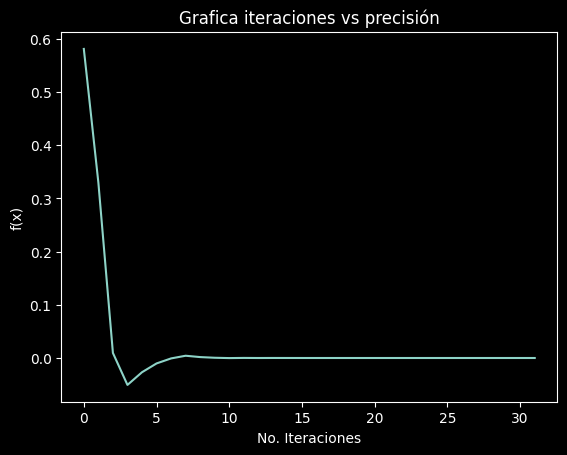

In [11]:
f = lambda x: np.sqrt(np.exp(np.sin(x**2))-np.cos(x)) - 1

a = -4
b = -2
tol = 10**-9

li, lf= Grafica(f, a, b, tol, 100)